In [1]:
using PyPlot
using HDF5
using AlfvenDetectors

In [2]:
datapath = "/home/vit/vyzkum/alfven/cdb_data/data_sample"

"/home/vit/vyzkum/alfven/cdb_data/data_sample"

In [67]:
files = readdir(datapath)

18-element Array{String,1}:
 "Jldata10000.h5"
 "Jldata10001.h5"
 "Jldata10002.h5"
 "Jldata10003.h5"
 "Jldata10004.h5"
 "Jldata10005.h5"
 "Jldata10006.h5"
 "Jldata10007.h5"
 "Jldata10008.h5"
 "Jldata10370.h5"
 "Jldata10514.h5"
 "Jldata10800.h5"
 "Jldata10866.h5"
 "Jldata10870.h5"
 "Jldata10889.h5"
 "Jldata10892.h5"
 "Jldata10893.h5"
 "Jldata10975.h5"

In [68]:
shotno = 10000 + 892
file = joinpath(datapath, filter(x->occursin("$shotno", x), files)[1])
data = AlfvenDetectors.readnormlogupsd(file);
f = AlfvenDetectors.readsignal(file, "f_Uprobe")
t = AlfvenDetectors.readsignal(file, "t_Uprobe")
size(data)

(513, 8883)

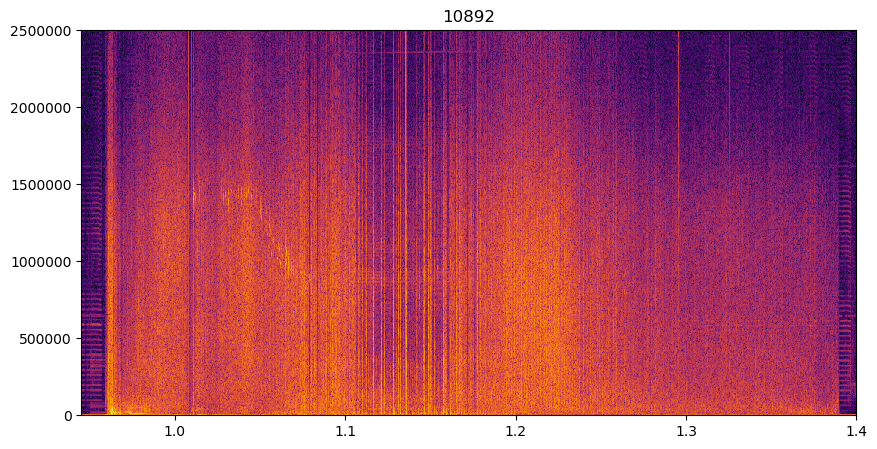

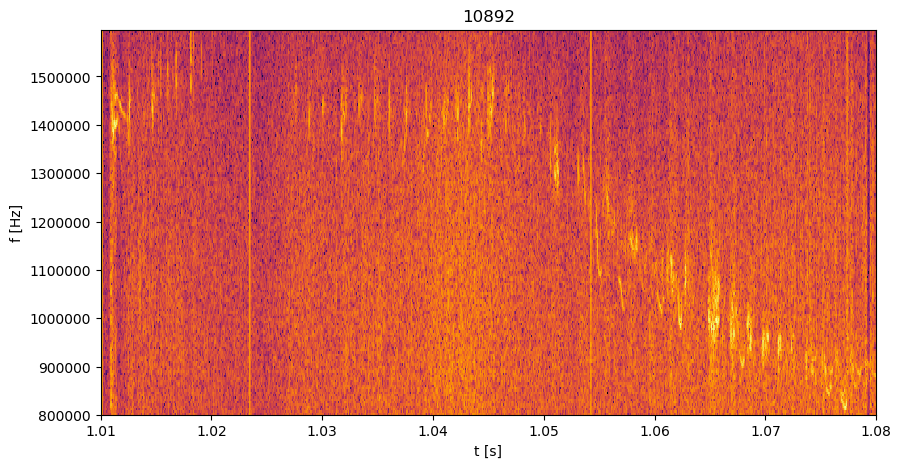

PyObject Text(24.0, 0.5, 'f [Hz]')

In [70]:
cmap = "inferno"
figure(figsize=(10,5))
title(shotno)
pcolormesh(t,f,data,cmap=cmap)
figure(figsize=(10,5))
title(shotno)
ylim = [800000,1600000]
xlim = [1.01, 1.08]
yinds = ylim[1] .< f .< ylim[2]
xinds = xlim[1] .< t .< xlim[2]
pcolormesh(t[xinds],f[yinds],data[yinds,xinds],cmap=cmap)
xlabel("t [s]")
ylabel("f [Hz]")

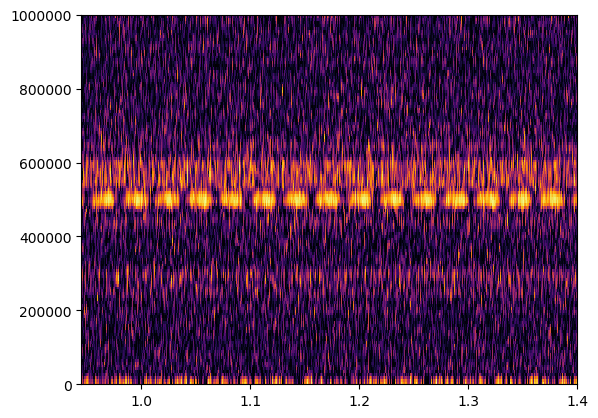

PyObject <matplotlib.collections.QuadMesh object at 0x7fb00a5cc630>

In [62]:
coil = 12
mirnovdata = AlfvenDetectors.readmscamp(file,coil)
mt = AlfvenDetectors.readsignal(file,"t_cohere")
ft = AlfvenDetectors.readsignal(file,"f_cohere")
pcolormesh(mt,ft,mirnovdata,cmap=cmap)